## Plotting Software to display comparisons between ray-tracing results and predictions of various geolocation and refractive index determination techniques.

## The software requires that you have a folder identified as "ray_data" on your desktop and that the output "data.csv" file is stored into this folder. 

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/ray/Desktop/ray_data/data.csv


In [4]:
#df.info()

In [5]:
df.tail(-500)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,bearing,bx,by,bz,B,b_kx,b_kz,dip,hv_sm,th_sm,lgc_sm,hv_cm,th_cm,lgc_cm,lgc_diff_2p,lgc_diff_sm,lgc_diff_cm,nr_diff_2p,elv_init_select
500,5,24.3,565000,10000,61.724346,-148.917557,0.922291,6584008.0,kod,15.408551,0.078146,2012-09-20 22:00:00,10.072163,497.866145,213.0080,252.552862,0.077823,498.388209,0.918674,2,61.693517,-148.694048,24.927550,11634.612387,3760.858013,45930.562191,47530.251436,0.255329,0.966344,75.199456,115,0.086080,548.416025,141.139405,0.084961,541.289164,-0.522064,-50.549879,-43.423019,0.003616,NaN
501,5,24.3,575000,10000,61.795948,-148.856750,0.917947,6588264.0,kod,14.507101,0.079490,2012-09-20 22:00:00,10.076217,506.429879,217.2640,257.369911,0.079145,506.814339,0.917770,2,61.762219,-148.626544,24.987001,11592.916344,3755.640651,45964.639074,47552.587640,0.254335,0.966606,75.258379,115,0.087670,558.544633,142.092965,0.086521,551.227261,-0.384461,-52.114755,-44.797382,0.000177,NaN
502,5,24.2,565000,10000,61.727818,-148.914734,0.923423,6583122.5,kod,15.503665,0.078214,2012-09-20 22:00:00,10.072351,498.299335,212.1225,251.687989,0.077894,498.843895,0.919493,2,61.697233,-148.690406,24.930757,11632.358754,3760.577016,45932.409289,47531.462557,0.255275,0.966358,75.202643,115,0.086080,548.416025,141.139405,0.084961,541.289164,-0.544560,-50.116690,-42.989829,0.003930,NaN
503,5,24.2,575000,10000,61.799488,-148.853882,0.919082,6587522.5,kod,14.607735,0.079559,2012-09-20 22:00:00,10.076408,506.870616,216.5225,256.490369,0.079218,507.278873,0.918589,2,61.766005,-148.622814,24.990287,11590.616169,3755.351698,45966.512941,47553.815425,0.254280,0.966621,75.261627,115,0.087670,558.544633,142.092965,0.086521,551.227261,-0.408258,-51.674018,-44.356645,0.000493,NaN
504,5,24.2,585000,10000,61.871094,-148.792938,0.914919,6590078.0,kod,13.691852,0.080904,2012-09-20 22:00:00,10.080471,515.437150,219.0780,261.304350,0.080540,515.701622,0.917687,2,61.834645,-148.555019,25.050036,11548.884035,3750.088562,46000.402037,47576.011542,0.253287,0.966882,75.320487,115,0.089259,568.666256,143.059891,0.088080,561.155969,-0.264472,-53.229106,-45.718819,-0.002768,NaN
505,5,24.2,595000,10000,61.942635,-148.731903,0.910965,6590688.5,kod,12.764836,0.082248,2012-09-20 22:00:00,10.084540,523.999364,219.6885,266.129905,0.081860,524.112137,0.916786,2,61.903151,-148.487018,25.110004,11507.163333,3744.787665,46034.076909,47598.051215,0.252296,0.967142,75.379225,115,0.090846,578.781282,144.040182,0.089637,571.075601,-0.112772,-54.781918,-47.076237,-0.005820,NaN
506,5,24.1,565000,10000,61.731567,-148.911377,0.924743,6582136.5,kod,15.592870,0.078290,2012-09-20 22:00:00,10.072575,498.787018,211.1365,250.822325,0.077966,499.298247,0.920309,2,61.700938,-148.686772,24.933956,11630.111570,3760.296710,45934.250501,47532.669771,0.255222,0.966372,75.205821,115,0.086080,548.416025,141.139405,0.084961,541.289164,-0.511230,-49.629007,-42.502147,0.004435,NaN
507,5,24.1,575000,10000,61.803310,-148.850449,0.920412,6586650.0,kod,14.705453,0.079637,2012-09-20 22:00:00,10.076637,507.368029,215.6500,255.610021,0.079291,507.742054,0.919406,2,61.769781,-148.619094,24.993565,11588.322543,3755.063449,45968.380849,47555.039257,0.254226,0.966635,75.264865,115,0.087670,558.544633,142.092965,0.086521,551.227261,-0.374025,-51.176604,-43.859232,0.001006,NaN
508,5,24.1,585000,10000,61.874996,-148.789429,0.916246,6589445.0,kod,13.798025,0.080983,2012-09-20 22:00:00,10.080705,515.944247,218.4450,260.409340,0.080614,516.173654,0.918504,2,61.838491,-148.551210,25.053393,11546.543794,3749.792258,46002.296379,47577.251788,0.253232,0.966897,75.323785,115,0.089259,568.666256,143.059891,0.088080,561.155969,-0.229407,-52.722009,-45.211722,-0.002258,NaN
509,5,24.1,595000,10000,61.946617,-148.728317,0.912286,6590235.0,kod,12.873543,0.082329,2012-09-20 22:00:00,10.084779,524.516097,219.2350,265.220257,0.081936,524.593043,0.917604,2,61.907067,-148.483121,25.113442,11504.776307

In [6]:
df['lgc_diff_2p'].describe()

count    1.473000e+03
mean    -9.585815e-14
std      2.510763e+00
min     -2.529988e+00
25%     -1.856313e+00
50%     -4.495050e-01
75%      3.370540e-01
max      1.036969e+01
Name: lgc_diff_2p, dtype: float64

In [7]:
df['lgc_diff_sm'].describe()

count    1473.000000
mean      -44.084713
std        43.526619
min      -237.791556
25%       -76.967498
50%       -26.458623
75%       -12.614003
max        14.713767
Name: lgc_diff_sm, dtype: float64

In [8]:
df['lgc_diff_cm'].describe()

count    1473.000000
mean      -42.521704
std        43.240651
min      -162.886628
25%       -70.403371
50%       -26.612029
75%       -10.795390
max        12.525386
Name: lgc_diff_cm, dtype: float64

In [9]:
df['nr_diff_2p'].describe()

count    1.473000e+03
mean     7.326115e-17
std      6.487318e-03
min     -1.524639e-02
25%     -3.854782e-03
50%     -3.755742e-04
75%      3.100795e-03
max      3.361814e-02
Name: nr_diff_2p, dtype: float64

In [10]:
df['h_2p'].describe()

count    1473.000000
mean      242.923694
std       102.445557
min        88.697808
25%       162.313339
50%       236.047451
75%       290.118218
max       456.013396
Name: h_2p, dtype: float64

In [11]:
bins = np.arange(-52.5, 52.5,5)

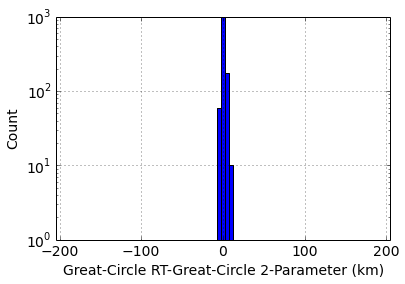

In [12]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-205, 205)
plt.ylim(1,1000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

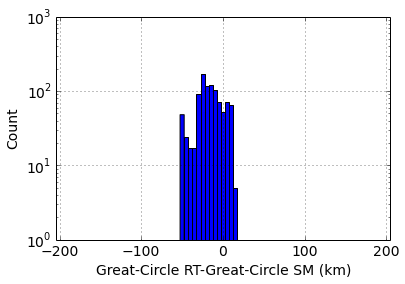

In [13]:
df['lgc_diff_sm'].hist(bins=bins, log=True)
plt.xlim(-205, 205)
plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
plt.ylabel('Count')

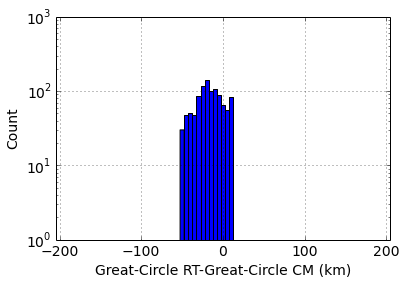

In [14]:
df['lgc_diff_cm'].hist(bins=bins, log=True)
plt.xlim(-205, 205)
plt.ylim(1, 1000)
plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
plt.ylabel('Count')

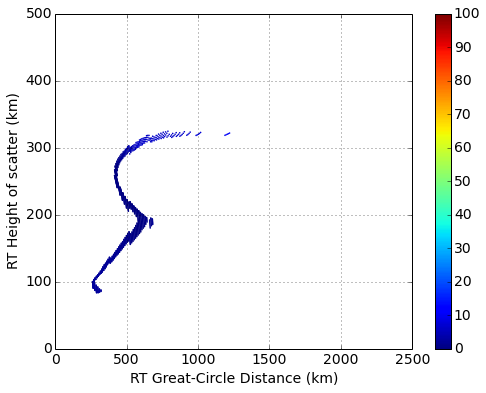

In [15]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

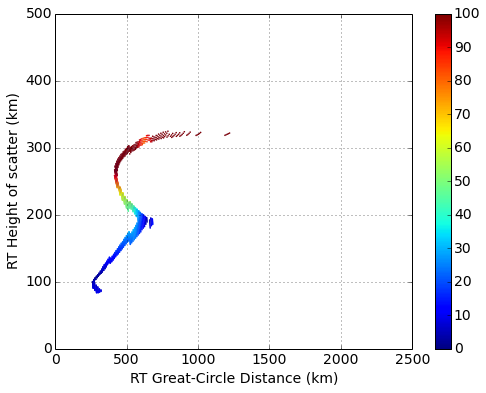

In [16]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Standard Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_sm'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

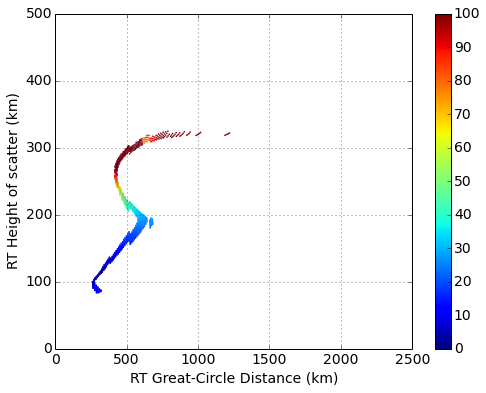

In [17]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Chisham Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_cm'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

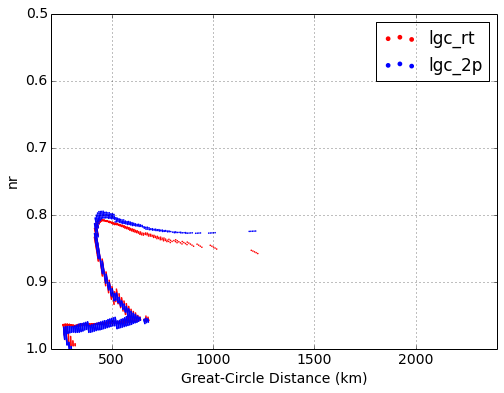

In [18]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', label='lgc_rt')
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none', label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 2400)
ax.set_ylim(1, 0.5)
ax.set_ylabel ('nr')
ax.grid()
ax.legend(loc='upper right', markerscale=3)

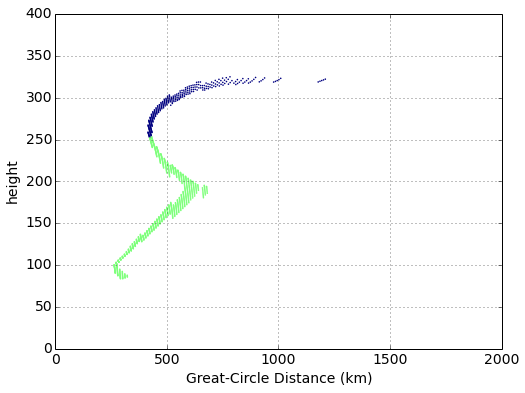

In [19]:
xvar = df['lgc_2p']
yvar = df['height']
color = df['phase']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c= color, s=10, marker='.', edgecolor='none', vmin=1, vmax=3)
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(0, 2000)
ax.set_ylim(0, 400)
ax.set_ylabel ('height')
ax.grid()
#Blue dots represent Phase 1 rays: penetrating rays that have have one scatter region.
#green dots represent Phase 2 rays: reflected rays that can backscatter in the bottomside
            #E-layer and F-layer before being reflected by the ionosphere. These are
            #the only rays capable of 1 1/2 hop backscatter.

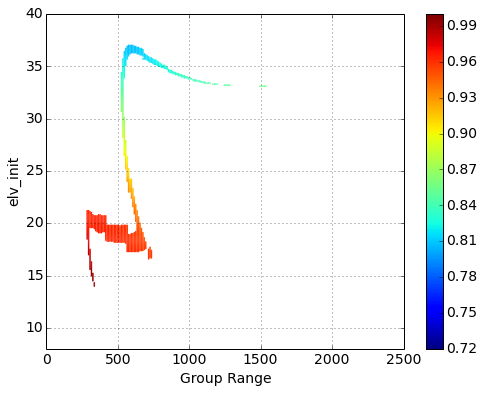

In [20]:
xvar = df['gran']/1000.
yvar = df['elv_init']
color = df['nr']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.72, vmax=1.0) 
plt.colorbar(scat)
ax.set_xlabel ('Group Range')
ax.set_xlim(0, 2500)
ax.set_ylim(8, 40)
ax.set_ylabel ('elv_init')
ax.grid()

In [21]:
df['lgc_diff_2p'].describe()

count    1.473000e+03
mean    -9.585815e-14
std      2.510763e+00
min     -2.529988e+00
25%     -1.856313e+00
50%     -4.495050e-01
75%      3.370540e-01
max      1.036969e+01
Name: lgc_diff_2p, dtype: float64

In [22]:
df['nr_diff_2p'].describe()

count    1.473000e+03
mean     7.326115e-17
std      6.487318e-03
min     -1.524639e-02
25%     -3.854782e-03
50%     -3.755742e-04
75%      3.100795e-03
max      3.361814e-02
Name: nr_diff_2p, dtype: float64

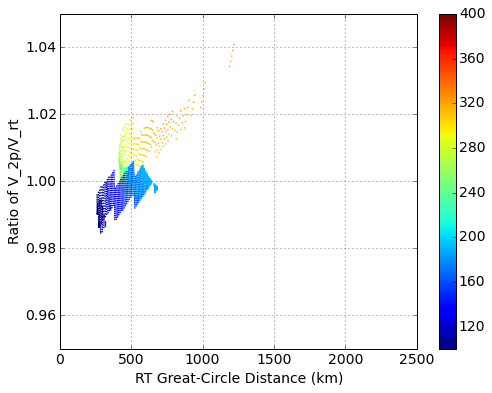

In [23]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [24]:
bins_nr = np.arange(-.025, .025, .001)

In [25]:
bins_nr

array([ -2.50000000e-02,  -2.40000000e-02,  -2.30000000e-02,
        -2.20000000e-02,  -2.10000000e-02,  -2.00000000e-02,
        -1.90000000e-02,  -1.80000000e-02,  -1.70000000e-02,
        -1.60000000e-02,  -1.50000000e-02,  -1.40000000e-02,
        -1.30000000e-02,  -1.20000000e-02,  -1.10000000e-02,
        -1.00000000e-02,  -9.00000000e-03,  -8.00000000e-03,
        -7.00000000e-03,  -6.00000000e-03,  -5.00000000e-03,
        -4.00000000e-03,  -3.00000000e-03,  -2.00000000e-03,
        -1.00000000e-03,   2.08166817e-17,   1.00000000e-03,
         2.00000000e-03,   3.00000000e-03,   4.00000000e-03,
         5.00000000e-03,   6.00000000e-03,   7.00000000e-03,
         8.00000000e-03,   9.00000000e-03,   1.00000000e-02,
         1.10000000e-02,   1.20000000e-02,   1.30000000e-02,
         1.40000000e-02,   1.50000000e-02,   1.60000000e-02,
         1.70000000e-02,   1.80000000e-02,   1.90000000e-02,
         2.00000000e-02,   2.10000000e-02,   2.20000000e-02,
         2.30000000e-02,

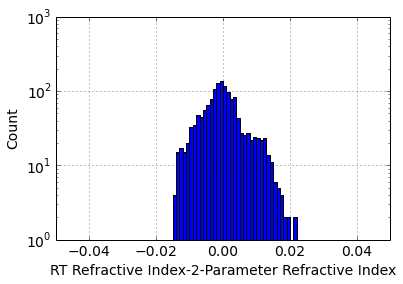

In [26]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.05, .05)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

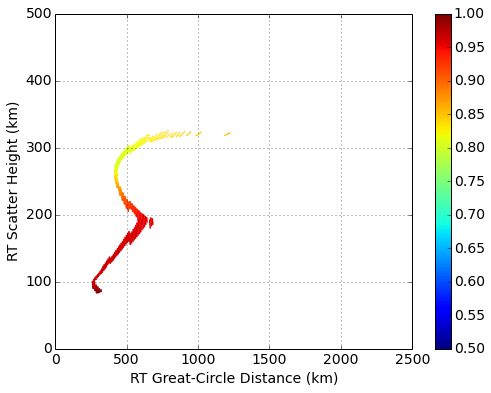

In [27]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.5, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

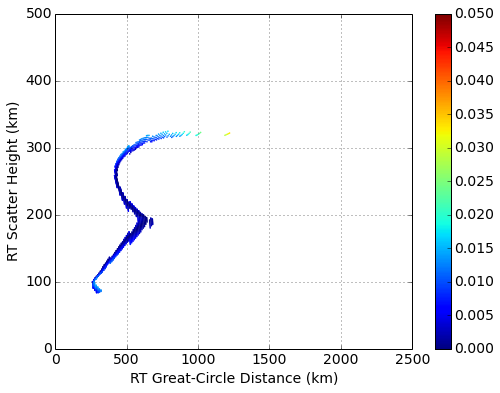

In [28]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0., vmax=0.05)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()